In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

import pandas as pd

data = {
    'Age': [22, 25, 47, 52, 46, 56, 55, 60, None, 34],
    'Salary': [20000, 25000, 47000, 52000, 46000, 56000, 55000, 60000, 58000, None],
    'Purchased': ['No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)
df.head()

,Age,Salary,Purchased
0,22.0,20000.0,No
1,25.0,25000.0,No
2,47.0,47000.0,Yes
3,52.0,52000.0,Yes
4,46.0,46000.0,Yes


In [159]:
#Filling missing values

for i in range(len(df['Age'])):
    if pd.isna(df['Age'].iloc[i]) and pd.notna(df['Age'].iloc[i - 1]) and pd.notna(df['Age'].iloc[i + 1]):
        df.loc[i, 'Age'] = (df['Age'].iloc[i - 1] + df['Age'].iloc[i + 1]) / 2


for i in range(len(df['Salary'])):
    if pd.isna(df['Salary'].iloc[i]):
        df.loc[i, 'Salary'] = df['Salary'].mean()

df['Salary'] = df['Salary'].round()


In [160]:
df['Purchased'] = df['Purchased'].str.strip().str.lower() == 'yes'
df['Purchased'] = df['Purchased'].map({True: 1, False: 0})


In [161]:
y = df['Purchased']
X = df[['Age', 'Salary']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=132)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [162]:
#Model ceofficients and intercept

print(f'model coefficients: {model.coef_}')
print(f'model intercept: {model.intercept_}')

model coefficients: [[5.52821250e-01 8.73295564e-06]]
model intercept: [-22.28038604]


In [163]:
predictions = model.predict(X_test)
print(f'predictions: {predictions}')

predictions: [1 0 1]


In [164]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'conf_matrix: {conf_matrix}')


accuracy: 1.0
precision: 1.0
recall: 1.0
conf_matrix: [[1 0]
 [0 2]]


In [165]:
# Predicting


a = model.predict([[45, 50000]])
print(f'45 years old with 50 000 salary would buy: {a} == > Yes')

45 years old with 50 000 salary would buy: [1] == > Yes


C:\Users\Sandriko\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


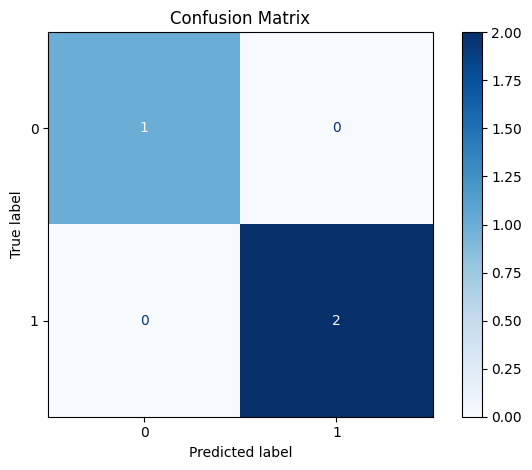

In [167]:
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap='Blues')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()
